In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Exploratory Data Analysis 

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
df.isna().sum()   #Dataset has no null values. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

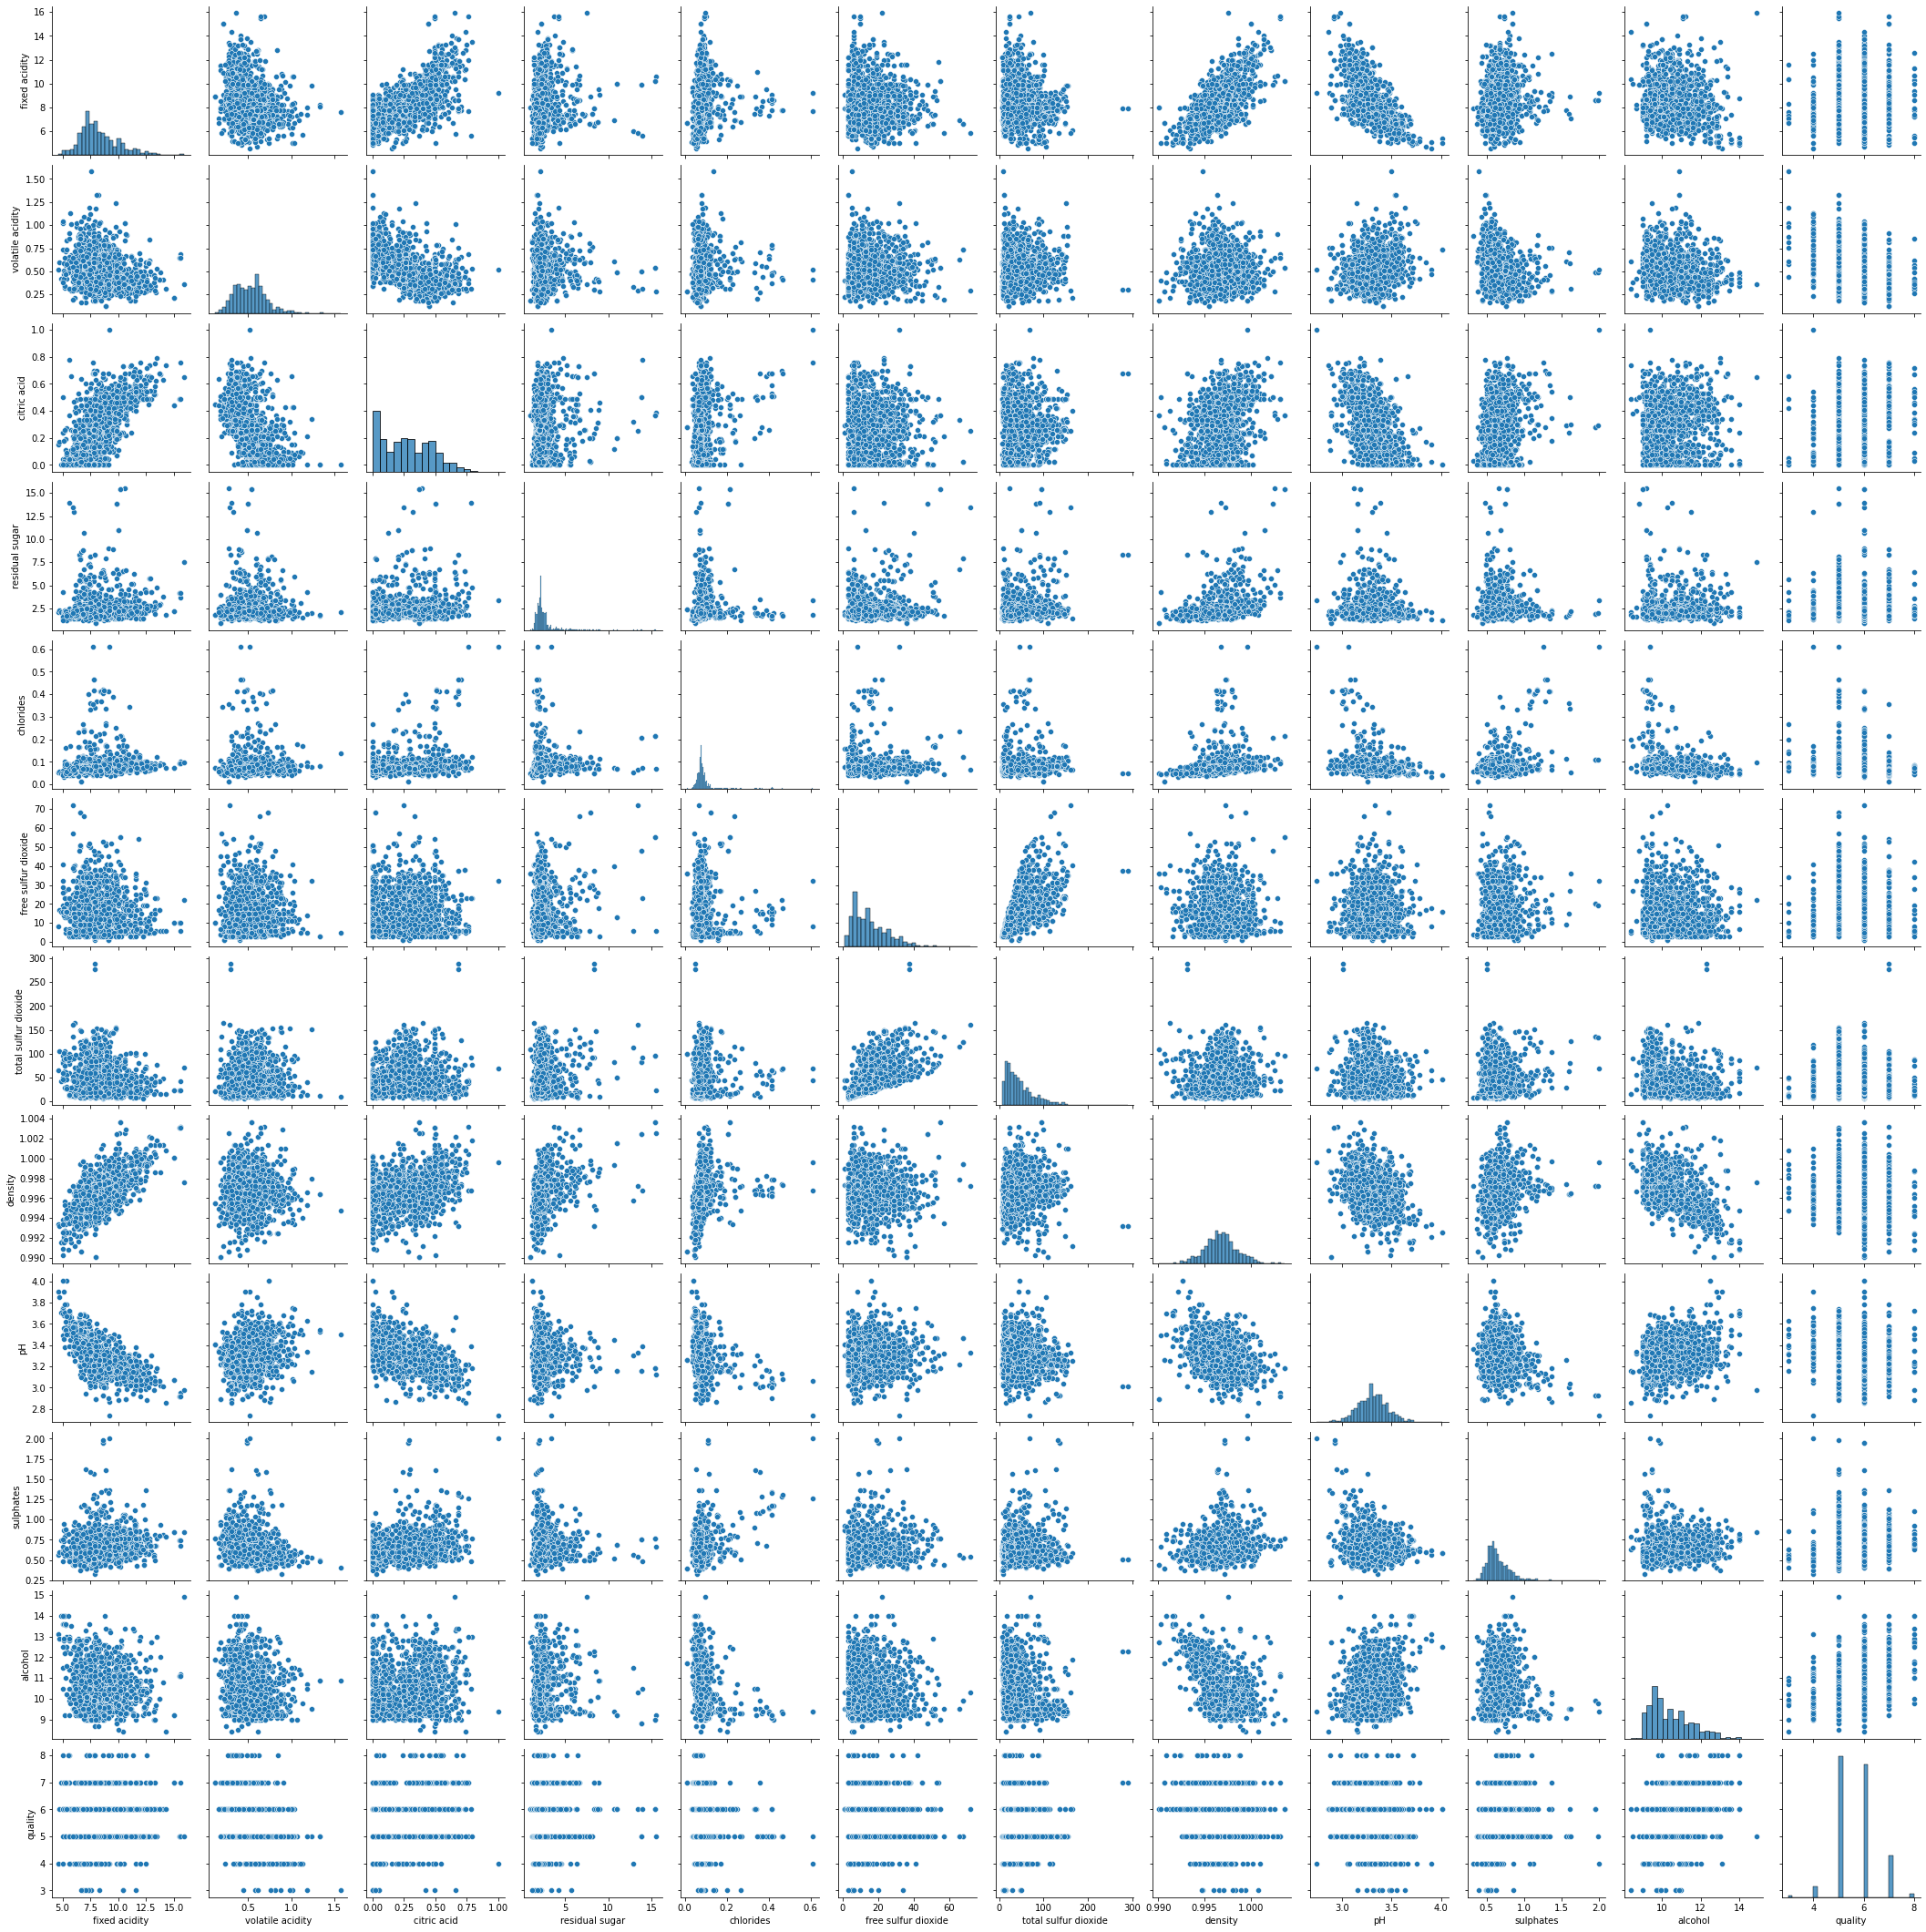

In [7]:
sns.pairplot(data=df)

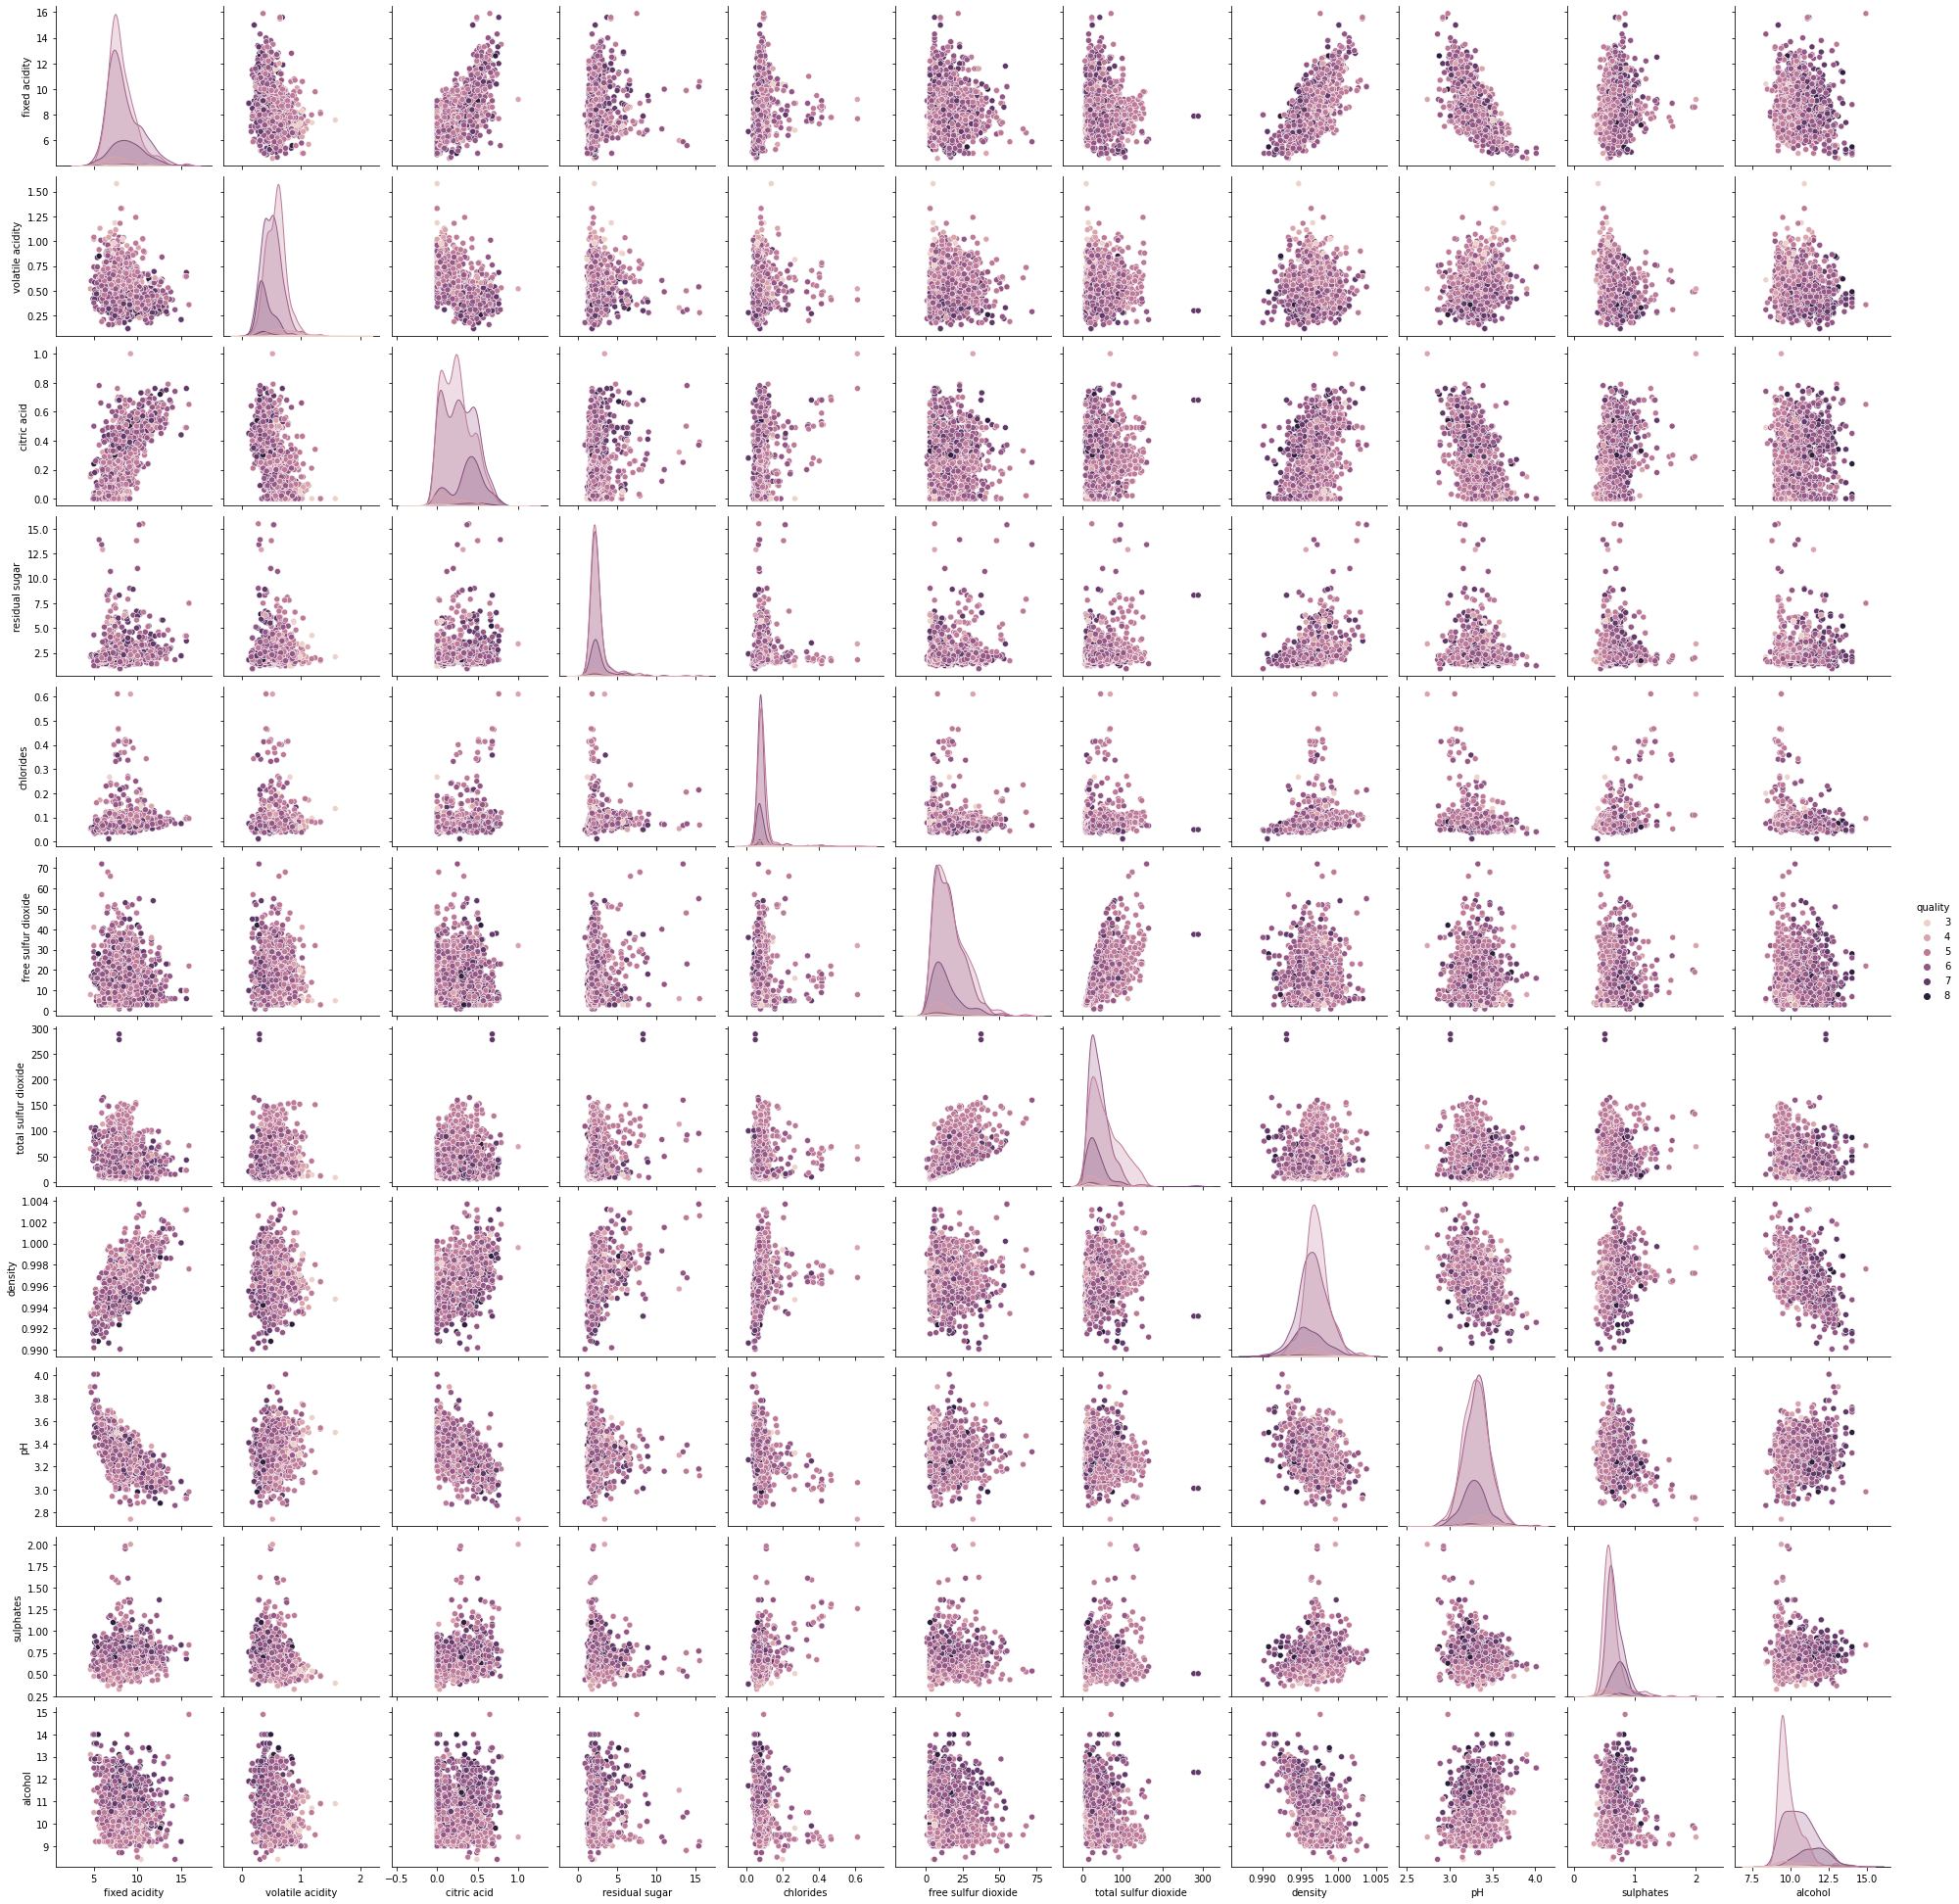

In [8]:
sns.pairplot(data=df, hue='quality')

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

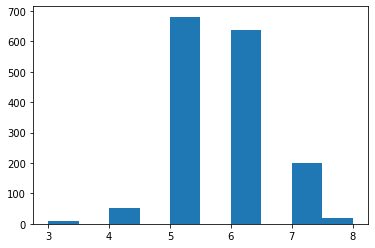

In [9]:
plt.hist(data=df, x='quality')

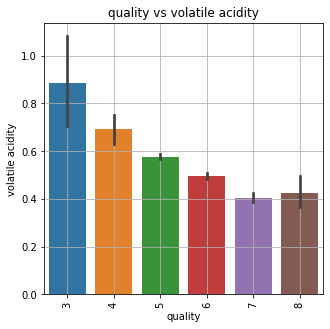

In [10]:
plt.figure(figsize=(5,5))

sns.barplot(x="quality",y="volatile acidity",data=df)

plt.title("quality vs volatile acidity")

plt.xlabel("quality")
plt.ylabel("volatile acidity")

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.grid(True)

plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

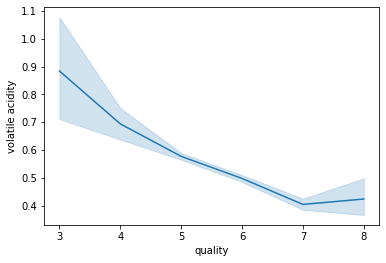

In [11]:
sns.lineplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

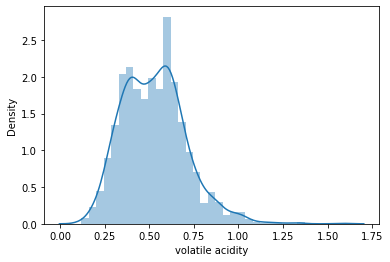

In [12]:
sns.distplot(df['volatile acidity'])

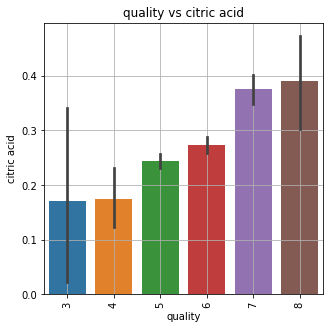

In [13]:
plt.figure(figsize=(5,5))

sns.barplot(x="quality",y="citric acid",data=df)

plt.title("quality vs citric acid")

plt.xlabel("quality")
plt.ylabel("citric acid")

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.grid(True)

plt.show()

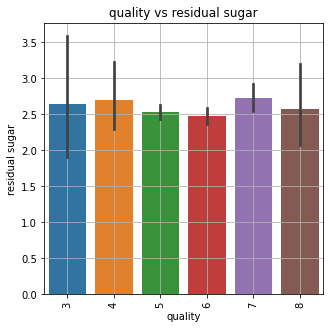

In [14]:
plt.figure(figsize=(5,5))

sns.barplot(x="quality",y="residual sugar",data=df)

plt.title("quality vs residual sugar")

plt.xlabel("quality")
plt.ylabel("residual sugar")

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.grid(True)

plt.show()

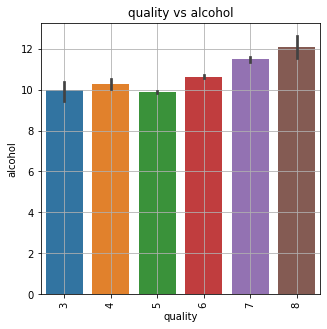

In [15]:
plt.figure(figsize=(5,5))

sns.barplot(x="quality",y="alcohol",data=df)

plt.title("quality vs alcohol")

plt.xlabel("quality")
plt.ylabel("alcohol")

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.grid(True)

plt.show()

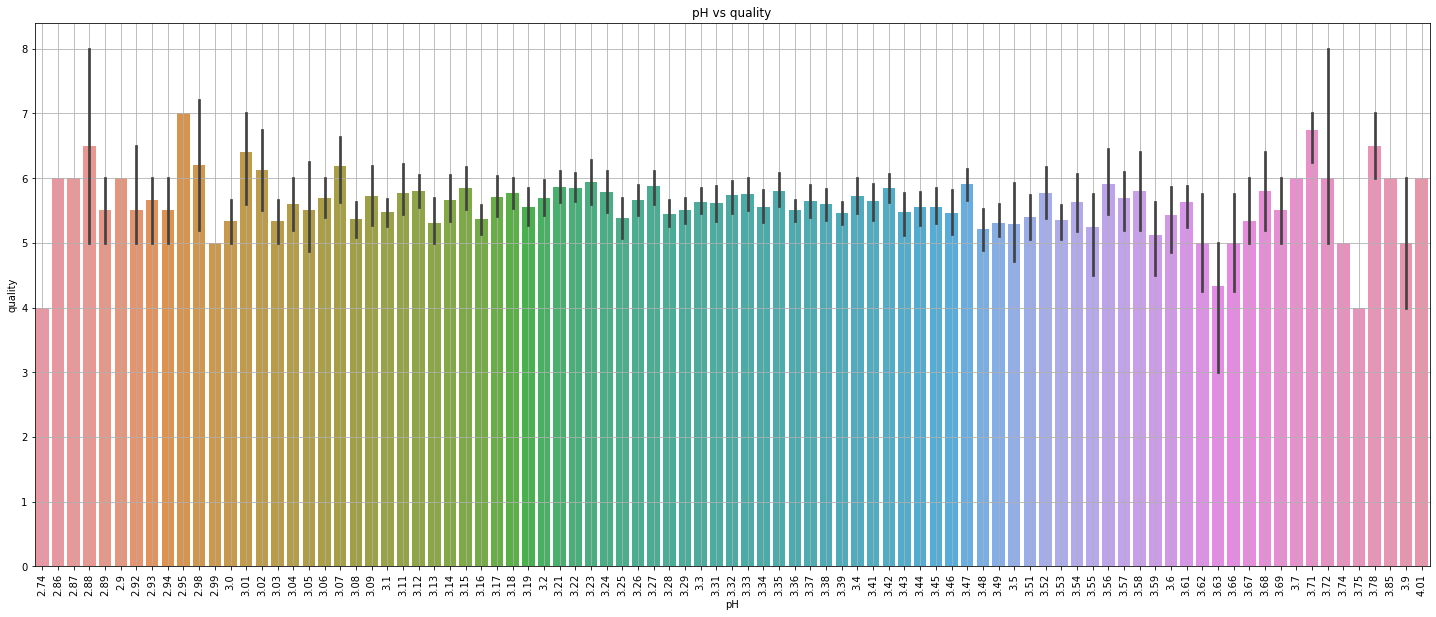

In [16]:
plt.figure(figsize=(25,10))

sns.barplot(x="pH",y="quality",data=df)

plt.title("pH vs quality")

plt.xlabel("pH")
plt.ylabel("quality")

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.grid(True)

plt.show()

In [17]:
df.corr().style.background_gradient()

<AxesSubplot:>

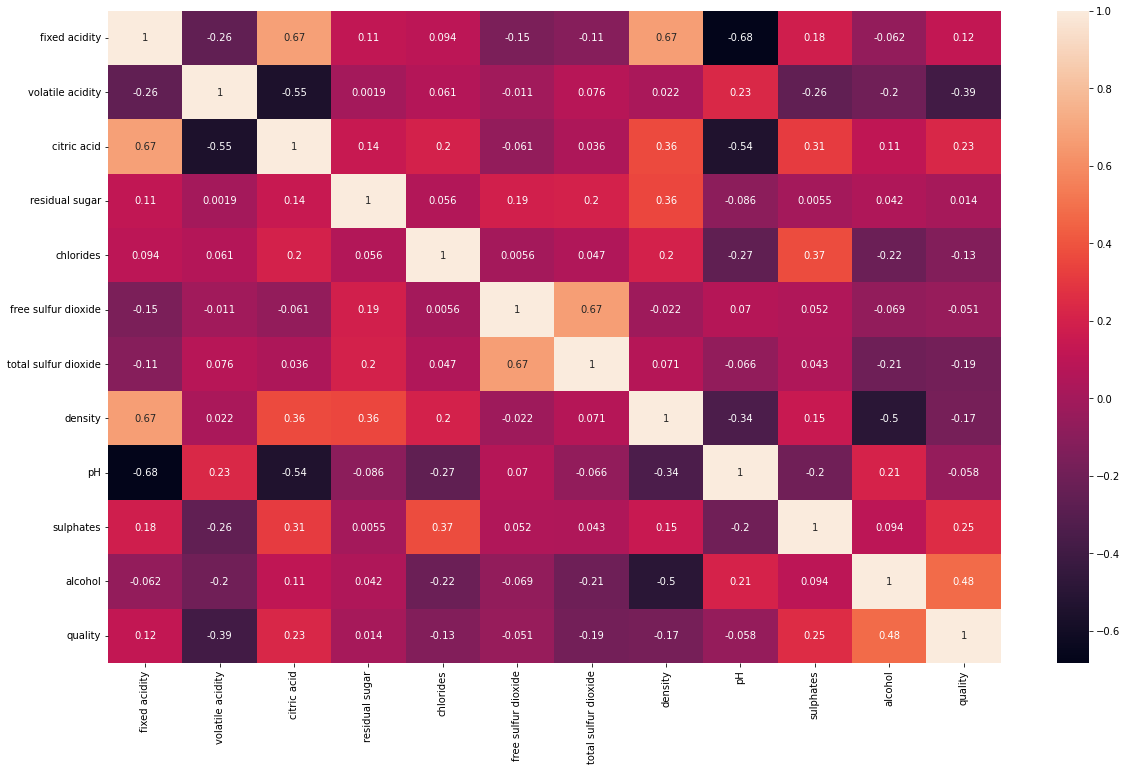

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

As the correlation ranges from -1 to +1 and data have values between this range it can be said that there is a correlation.

If both column has +ve correlation between them then it can be said that they are proportional to each other.
If both column has -ve correlation between them then it can be said that they are inversely proportional to each other.

In [19]:
def helper(row):
    if row.quality < 4.5:
        return 0
    if row.quality < 6.5:
        return 1
    else:
        return 2
df['quality']=df.apply(helper,axis=1)

In [20]:
df.quality.value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

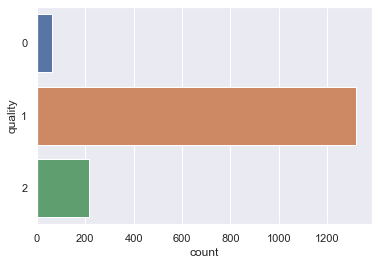

In [21]:
sns.set(style="darkgrid")
x=sns.countplot(y= "quality",data=df)

In [22]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [23]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [24]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [25]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30, random_state=0)

# Model Creation

In [26]:
logreg=LogisticRegression()

svm=SVC()

rf=RandomForestClassifier()


In [27]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest, ypred))

In [28]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.89      0.96      0.92       412
           2       0.53      0.36      0.43        50

    accuracy                           0.86       480
   macro avg       0.47      0.44      0.45       480
weighted avg       0.82      0.86      0.84       480



In [29]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.86      1.00      0.92       412
           2       0.00      0.00      0.00        50

    accuracy                           0.86       480
   macro avg       0.29      0.33      0.31       480
weighted avg       0.74      0.86      0.79       480



In [30]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.91      0.95      0.93       412
           2       0.59      0.58      0.59        50

    accuracy                           0.88       480
   macro avg       0.50      0.51      0.50       480
weighted avg       0.84      0.88      0.86       480



# Hyperparametric Tuning

In [31]:
logreg=LogisticRegression(solver='liblinear')

svm=SVC(kernel='sigmoid')

In [32]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.89      0.98      0.93       412
           2       0.62      0.32      0.42        50

    accuracy                           0.87       480
   macro avg       0.50      0.43      0.45       480
weighted avg       0.82      0.87      0.84       480



In [33]:
#cross validation on logreg for accuracy
cvs=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print(cvs.mean())

0.8286442006269592


In [34]:
mymodel(svm)


              precision    recall  f1-score   support

           0       0.05      0.11      0.07        18
           1       0.87      0.90      0.88       412
           2       0.33      0.10      0.15        50

    accuracy                           0.79       480
   macro avg       0.42      0.37      0.37       480
weighted avg       0.78      0.79      0.78       480



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
for i in range (51):
    rf = RandomForestClassifier(random_state=i)
    rf.fit(xtrain,ytrain)
    ypred = rf.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"{i}   :- {ac}")

0   :- 0.8875
1   :- 0.88125
2   :- 0.88125
3   :- 0.8708333333333333
4   :- 0.88125
5   :- 0.8833333333333333
6   :- 0.8791666666666667
7   :- 0.8854166666666666
8   :- 0.8875
9   :- 0.8791666666666667
10   :- 0.8770833333333333
11   :- 0.8875
12   :- 0.8791666666666667
13   :- 0.8875
14   :- 0.8895833333333333
15   :- 0.8854166666666666
16   :- 0.8833333333333333
17   :- 0.8791666666666667
18   :- 0.8854166666666666
19   :- 0.8854166666666666
20   :- 0.8791666666666667
21   :- 0.875
22   :- 0.8791666666666667
23   :- 0.8854166666666666
24   :- 0.88125
25   :- 0.88125
26   :- 0.8833333333333333
27   :- 0.8833333333333333
28   :- 0.8770833333333333
29   :- 0.8833333333333333
30   :- 0.8770833333333333
31   :- 0.8791666666666667
32   :- 0.8833333333333333
33   :- 0.875
34   :- 0.8791666666666667
35   :- 0.8791666666666667
36   :- 0.8791666666666667
37   :- 0.8875
38   :- 0.8770833333333333
39   :- 0.88125
40   :- 0.8833333333333333
41   :- 0.8833333333333333
42   :- 0.8791666666666667
4

# Final Result

In [37]:
rf = RandomForestClassifier(random_state=45)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Random Forest Classifier :-")
print(f"Accuracy score           :- {round(ac*100)}%")
print()
print("Classification Report    :-")
print(cr)

Random Forest Classifier :-
Accuracy score           :- 89%

Classification Report    :-
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.92      0.96      0.94       412
           2       0.67      0.64      0.65        50

    accuracy                           0.89       480
   macro avg       0.53      0.53      0.53       480
weighted avg       0.86      0.89      0.87       480



In [38]:
cvs = cross_val_score(rf , x,y , cv=10 , scoring="accuracy")

print(f"Mean Accuracy of Model :- {round(cvs.mean()*100)}%")

Mean Accuracy of Model :- 84%


# Conclusion

#### By doing the analysis we came to know that high quality of wine required low volatile acidity, high citric acid and high alcohol contain and residual sugar range should be between 2.5 to 3. After creating some model Random Forest model shows 89% accuracy thus Random Forest fits the best for my dataset. 




# THANK YOU